# CENSUS TRACK - Basic FOOD DESERT Tutorial

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading in necessary modules
import pandas as pd # viewing and manipulating excel files
import geopandas as gpd # viewing and manipulating geospatial data
import matplotlib.pyplot as plt # plotting the data
import requests # to request web to download data
import zipfile # to handle zip files 
import os # import operating system
import shutil

## Census Tract TIGER File

##### Topologically Integrated Geographic Encoding and Referencing (TIGER) files are a collection of geographic data used for mapping and spatial perform analysis. These files contain information about various entities such as roads, boundaries, and landmarks. They are often used along with demographic data to make detailed maps. 
##### Census track file for Indiana was downloaded. The file comes as a zip file that consists of a shape (.shp) file which will be used for the purpose of this tutorial.  

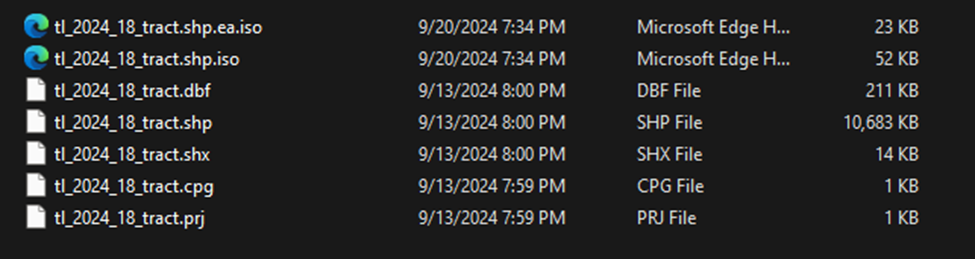

#### .shp file stores the geometric data, like points, lines, and polygons and their attributes. 
#### .dbf stores the attribute data i.e., in tabular form. 
#### .shx acts a link between the .shp and .dbf files in the form of index (navigation). This file allows GOS to quicky seek forwards and backwards through the file.  
#### All of the three files must be present in the same directory for the .shp to work, otherwise it would be incomplete and unusable. 

### Download the Census Tract Data for a State

##### Census code for each U.S State has been provided below. Use this code to download the data. 

In [ ]:
# FIPS of States in USA
fips_to_state = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan",
    27: "Minnesota", 28: "Mississippi", 29: "Missouri", 30: "Montana",
    31: "Nebraska", 32: "Nevada", 33: "New Hampshire", 34: "New Jersey",
    35: "New Mexico", 36: "New York", 37: "North Carolina", 38: "North Dakota",
    39: "Ohio", 40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island",
    45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas",
    49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington", 54: "West Virginia",
    55: "Wisconsin", 56: "Wyoming"
}

### Download the Shape File Function

In [ ]:
def download_extract_rename_zip_file(number):
    base_url = "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/"
    file_name = f"tl_2019_{number:02d}_tract.zip"
    url = base_url + file_name
    
    # Download the .zip file
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(file_name, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {file_name}")
        else:
            print(f"Failed to download {file_name}. Status code: {response.status_code}")
            return None, None
    except requests.RequestException as e:
        print(f"Error downloading {file_name}: {e}")
        return None, None

    # Extract the .zip file
    extract_folder = file_name[:-4]
    try:
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
        print(f"Extracted {file_name} to folder {extract_folder}")
    except zipfile.BadZipFile as e:
        print(f"Error extracting {file_name}: {e}")
        return None, None
    finally:
        # Delete the .zip file
        try:
            os.remove(file_name)
            print(f"Deleted {file_name}")
        except OSError as e:
            print(f"Error deleting {file_name}: {e}")

    # Get the state name based on the FIPS code
    state_name = fips_to_state.get(number)
    if state_name:
        new_folder_name = f"{state_name}_TIGER"
        try:
            # Check if the target folder already exists and delete it
            if os.path.exists(new_folder_name):
                shutil.rmtree(new_folder_name)
                print(f"Deleted existing folder {new_folder_name}")
            os.rename(extract_folder, new_folder_name)
            print(f"Renamed folder to {new_folder_name}")
            return new_folder_name, state_name
        except OSError as e:
            print(f"Error renaming folder to {new_folder_name}: {e}")
            return extract_folder, state_name
    else:
        print(f"No state name found for FIPS code {number}. Keeping default folder name.")
        return extract_folder, None

### Add the fips code for the interested State and call the function!

In [ ]:
# Call functions separately
fips = 18  
folder_name, state_name = download_extract_rename_zip_file(fips)

### Call the .shp CENSUS TRACT File from the downloaded file. 

In [ ]:
def display_shapefile(folder_name, number, state_name):
    """ Opens and plots the shapefile from the downloaded folder. """
    shp_file = os.path.join(folder_name, f"tl_2019_{number:02d}_tract.shp")
    
    if os.path.exists(shp_file):
        gdf = gpd.read_file(shp_file)
        return gdf
        # Plot the shapefile
        #gdf.plot(figsize=(10, 10), edgecolor="black")
        #plt.title(f"Map of {state_name} Census Tracts")
        #plt.show()
    else:
        print(f"Shapefile {shp_file} not found.")
        return None

In [ ]:
if folder_name and state_name:
    gdf = display_shapefile(folder_name, fips, state_name)

### Display the contents of the shape file for the state

In [ ]:
gdf

## FOOD Desert Data
##### The FOOD Access Research Atlas is a tool developed by the U.S. Department of Agriculture's Economic Research Service (USDA ERS). This data provides a spatial overview of food access indicators by census tract, allowing users to investigate multiple indicators of food store access. 
##### An overview of food access indicators for low-income and other census tracts using different measures of sipermarket accessibility. 
##### The downloaded zip file consists:
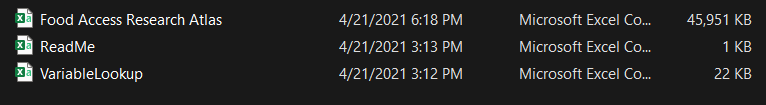

#### Read Me file consists of the citation link of where the data was downloaded from.
#### Variable Lookup is the metadata of the data. This indicates what each column value means in the data. 
#### Food Access Research Atlas is the data itself for the whole of USA until 2019. 

### Read the Food Desert Data

In [ ]:
# Read the Excel file 'FoodAccessResearchAtlasData2019.xlsx' into a DataFrame
# Hint: Use Pandas

In [ ]:
# Use sheet_name='Food Access Research Atlas' and header=0
# Then, extract the DataFrame from the dictionary

In [ ]:
df # display the data

### Explore what each Field Means

In [ ]:
# Read the Excel file 'Variable Lookup.xlsx' into a DataFrame
# Display its contents to understand what you will be plotting

### Filter out the State of Interest from Food Desert Data
##### This file has the Food Access data for all the states in the U.S.A in 2019.
##### Performing the analysis on a smaller scale increases the quality of the end-result.

In [ ]:
# Define variables (replace with appropriate values)
state_name = 
folder_name = 

# Filter the DataFrame to only include rows where the state is Indiana
filtered_df = df[df['...'] == f"{state_name}"]

# Save the filtered DataFrame to an Excel file in the folder named after the state
# For example, 'Indiana/Indiana_Food.xlsx'
...

In [ ]:
# display its contents

## Merge the CENSUS Table and Food Desert Data for the State

When joining different datasets, one must ensure that the data type i.e., whether it is an integer, float, string, is the same. We use the columns GEOID from TIGER shape file and CensusTract from Food Access to join the 2 tables. Before joining we convert both these columns into strings.

We use Outer Join so to keep the Rows that do not match (just in case). If you want to keep the rows that has a match use "inner".

In [ ]:
# Load the census tract shapefile into a GeoDataFrame named gdf
# Assume the shapefile is in the 'Indiana' folder, e.g., 'Indiana/tl_2019_18_tract.shp'
gdf = gpd.read_file('path/to/shapefile.shp')

# Convert the 'CensusTract' column in filtered_df and 'GEOID' in gdf to strings
filtered_df["CensusTract"] = ...
gdf["GEOID"] = gdf["GEOID"].astype(str)

# Merge the GeoDataFrame gdf with the DataFrame filtered_df
# Use an outer join on the appropriate columns
merged_df = gdf.merge(filtered_df, left_on="GEOID", right_on="CensusTract", how="outer")

In [ ]:
# Display the merged table

### Save the "merged" File into the State Folder

In [ ]:
# Save the merged GeoDataFrame as a shapefile in the state folder
merged_df.to_file(f".....", driver="ESRI Shapefile")

### Read the file

In [ ]:
State_Food = ...

### Task: Load the saved shapefile into a GeoDataFrame named State_Food. List its columns using State_Food.columns.tolist() to explore available variables.

## Plotting Time!

#### Population Plot

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the 'Pop2010' column with appropriate parameters
# Hint: Set vmin=0 and vmax=15000 to control the color scale
State_Food.plot(ax=ax, column=???, cmap="viridis", edgecolor='black', linewidth=0.2, legend=True, ...)
plt.show()

### Ensure the range of color pallete is accurate

In [ ]:
#print({you_excelfile name}['Pop2010'].max())

### LA LI 1 mile (Urban) and 10 miles (Rural)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the 'LILATracts' column with appropriate parameters
State_Food.plot(ax=ax, column=???, cmap="Oranges", edgecolor='black', linewidth=0.2, legend=True)
plt.title("Low Income and Low Access Indiana 2019")
plt.show()

### LA LI 1/2 mile (Urban) 10 miles (rural)

In [ ]:
# Explore which column holds this information and plot it

### LA LI 1 mile (Urban) 20 miles (rural)

In [ ]:
# Explore which column holds this information and plot it

### No vehicle (more than 100 housing units) and more than 20 miles from Nearest Supermarket

In [ ]:
# Explore which column holds this information and plot it

#### Try Choosing a Specific County and Plot that County. (Smaller Region more efficient Analysis!)